In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst
import importlib

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA(NSIM=400)
print("finished DEKA simulation")

finished DEKA simulation


In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS(NSIM=400)
print("finished RLS simulation")

finished RLS simulation


In [4]:
Q = 1e-3 * np.eye(6)
R = 1e-3 * np.eye(3*10)
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF(NSIM=400, Q_noise=Q, R_noise=R)
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")

t = np.arange(400)  # time steps 0..N-1


finished KF simulation


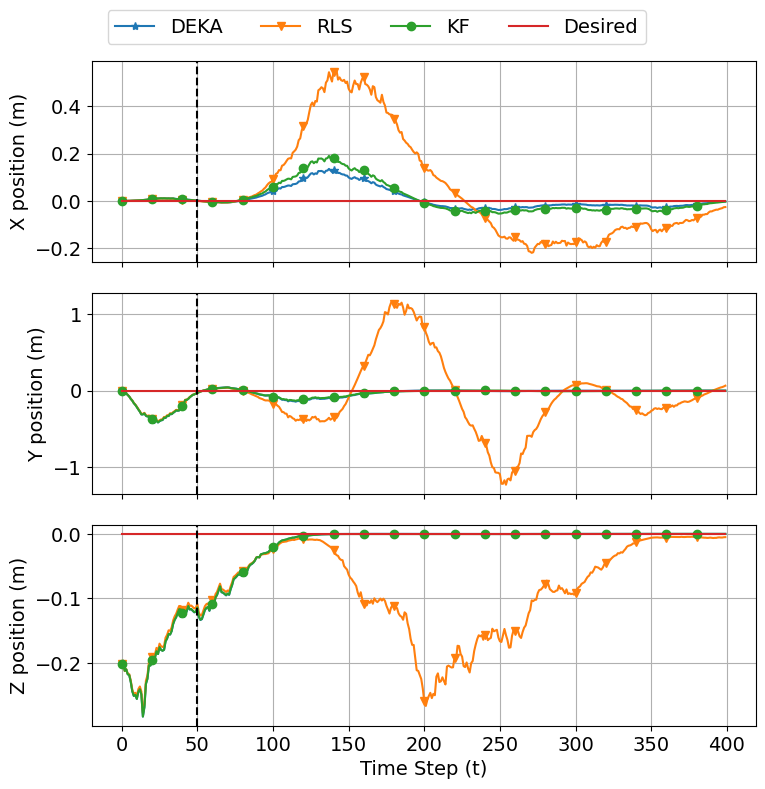

In [12]:
t = np.arange(400)  # time steps 0..N-1

x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

hov_des = np.linspace(0,0,200)

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
axs[0].plot(t, x_pos_deka,  marker = "*", markevery = 20,label='DEKA')
axs[0].plot(t, x_pos_rls,  marker = "v",markevery = 20,label='RLS')
axs[0].plot(t, x_pos_kf, marker="o", markevery = 20, label='KF')
axs[0].plot(t, hov_des, label='Desired')
axs[0].axvline(x=50, color='k', linestyle='--')
axs[0].set_ylabel('X position (m)')
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, marker = "*",markevery = 20)
axs[1].plot(t, y_pos_rls,  marker = "v",markevery = 20)
axs[1].plot(t, y_pos_kf,  marker = "o",markevery = 20)
axs[1].plot(t, hov_des)
axs[1].axvline(x=50, color='k', linestyle='--')
axs[1].set_ylabel('Y position (m)')
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, marker = "*",markevery = 20)
axs[2].plot(t, z_pos_rls,  marker = "v",markevery = 20)
axs[2].plot(t, z_pos_kf,  marker = "o",markevery = 20)
axs[2].plot(t, hov_des)
axs[2].axvline(x=50, color='k', linestyle='--')
axs[2].set_xlabel('Time Step (t)')
axs[2].set_ylabel('Z position (m)')
axs[2].grid(True)

# Create a single legend outside the subplots
fig.legend(['DEKA', 'RLS', 'KF', 'Desired'], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.0))

# fig.suptitle('Position Tracking')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the legend
plt.show()


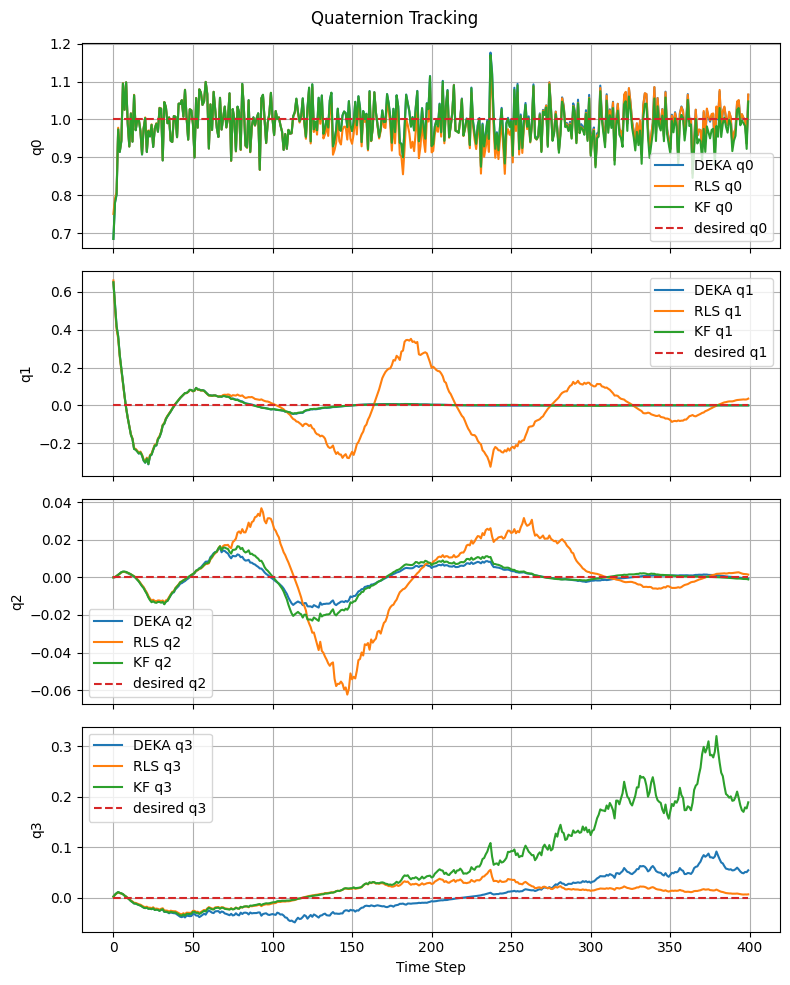

In [6]:
q0_deka  = [row[3] for row in x_deka]
q0_rls   = [row[3] for row in x_rls]
q0_kf   = [row[3] for row in x_kf]
q0_des = np.linspace(1,1,400)

q1_deka  = [row[4] for row in x_deka]
q1_rls   = [row[4] for row in x_rls]
q1_kf   = [row[4] for row in x_kf]
q1_des = np.linspace(0,0,400)

q2_deka  = [row[5] for row in x_deka]
q2_rls   = [row[5] for row in x_rls]
q2_kf   = [row[5] for row in x_kf]
q2_des = np.linspace(0,0,400)


q3_deka  = [row[6] for row in x_deka]
q3_rls   = [row[6] for row in x_rls]
q3_kf   = [row[6] for row in x_kf]
q3_des = np.linspace(0,0,400)

# Create subplots for quaternion components
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# q0 component
axs[0].plot(t, q0_deka, label='DEKA q0')
axs[0].plot(t, q0_rls, label='RLS q0')
axs[0].plot(t, q0_kf, label='KF q0')
axs[0].plot(t, q0_des, '--', label='desired q0')    
axs[0].set_ylabel('q0')
axs[0].legend()
axs[0].grid(True)

# q1 component
axs[1].plot(t, q1_deka, label='DEKA q1')
axs[1].plot(t, q1_rls, label='RLS q1')
axs[1].plot(t, q1_kf, label='KF q1')
axs[1].plot(t, q1_des, '--', label='desired q1')
axs[1].set_ylabel('q1')
axs[1].legend()
axs[1].grid(True)

# q2 component
axs[2].plot(t, q2_deka, label='DEKA q2')
axs[2].plot(t, q2_rls, label='RLS q2')
axs[2].plot(t, q2_kf, label='KF q2')
axs[2].plot(t, q2_des, '--', label='desired q2')
axs[2].set_ylabel('q2')
axs[2].legend()
axs[2].grid(True)

# q3 component
axs[3].plot(t, q3_deka, label='DEKA q3')
axs[3].plot(t, q3_rls, label='RLS q3')
axs[3].plot(t, q3_kf, label='KF q3')
axs[3].plot(t, q3_des, '--', label='desired q3')
axs[3].set_xlabel('Time Step')
axs[3].set_ylabel('q3')
axs[3].legend()
axs[3].grid(True)

# Set title and layout
fig.suptitle('Quaternion Tracking')
plt.tight_layout()
plt.show()


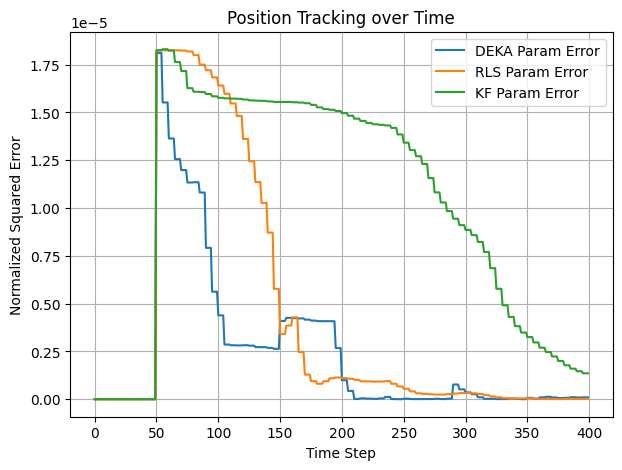

In [9]:
# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                   / np.sum(theta_deka_array**2, axis=1)
param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
                   / np.sum(theta_rls_array**2, axis=1)
param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
                   / np.sum(theta_ekf_array**2, axis=1)
# For each time i, compute MSE across parameters
mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

plt.figure(figsize=(7,5))
plt.plot(t, mse_deka_time, label='DEKA Param Error')
plt.plot(t, mse_rls_time,  label='RLS Param Error')
plt.plot(t, mse_ekf_time,  label='KF Param Error')

plt.xlabel('Time Step')
plt.ylabel('Normalized Squared Error')
plt.title('Position Tracking over Time')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assume the following arrays are already defined:
# # t: a 1D array for time steps
# # theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# # theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# # theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# # theta_deka_array: true parameter values, shape (N, num_params)

# # Create one figure with two subplots (stacked vertically)
# fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# # ---------------------------
# # Subplot 1: Parameter 0 (shifted parameter)
# # ---------------------------
# fig.suptitle('Parameter Estimate vs. Time', fontsize=14)

# axs[0].plot(t, theta_hat_deka_array[:, 0], label='DEKA')
# axs[0].plot(t, theta_hat_rls_array[:, 0], label='RLS')
# axs[0].plot(t, theta_hat_ekf_array[:, 0], label='KF')
# axs[0].plot(t, theta_ekf_array[:, 0], '--', label='True')
# axs[0].set_title('Perturbed Parameter Estimation')
# axs[0].set_ylabel('Parameter Value')
# axs[0].legend()
# axs[0].grid(True)

# # ---------------------------
# # Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# # ---------------------------
# # Compute the average (across parameter indices 1 to end) for each time step.
# theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
# theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
# theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
# theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

# axs[1].plot(t, theta_hat_deka_avg, label='DEKA')
# axs[1].plot(t, theta_hat_rls_avg, label='RLS')
# axs[1].plot(t, theta_hat_ekf_avg, label='KF')
# axs[1].plot(t, theta_deka_avg, '--', label='True')
# axs[1].set_title('Average of Non-perturbed Parameter Estimation')
# axs[1].set_xlabel('Time Step')
# axs[1].set_ylabel('Parameter Value')
# axs[1].legend()
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()

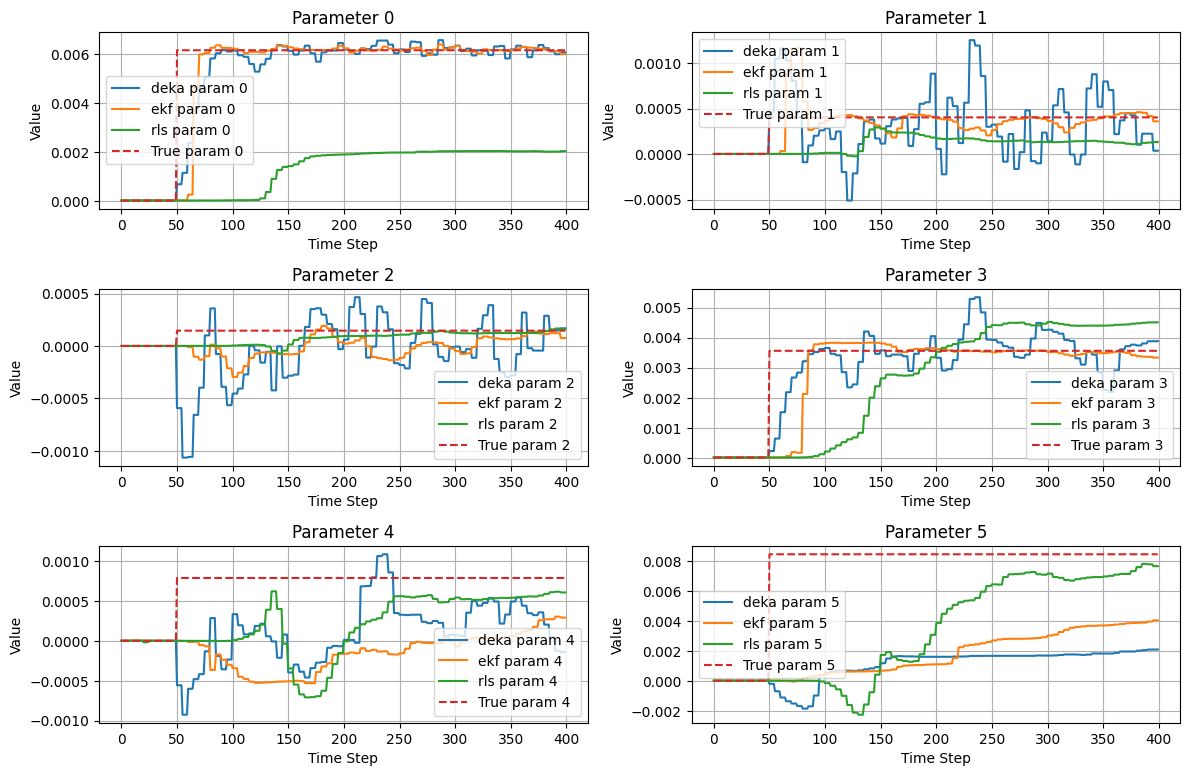

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'ekf param {j}')
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'rls param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


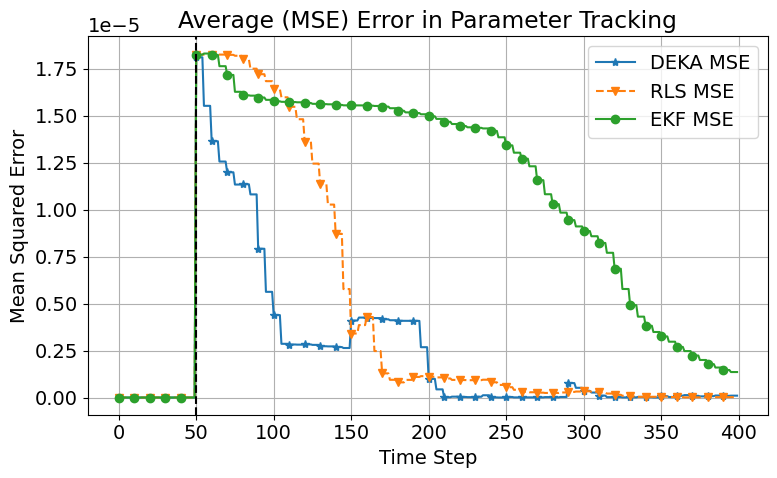

In [13]:

mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_ekf  = np.mean((theta_hat_ekf_array  - theta_deka_array)**2, axis=1)
mse_rls  = np.mean((theta_hat_rls_array  - theta_deka_array)**2, axis=1)

# plt.figure(figsize=(7,5))
# plt.plot(t, mse_deka, label='DEKA MSE')
# plt.plot(t, mse_rls,  label='RLS MSE')
# plt.plot(t, mse_ekf,  label='EKF MSE')
# plt.xlabel('Time Step')
# plt.ylabel('MSE (across all params)')
# plt.legend()
# plt.grid(True)
# plt.show()


# Increase global font size for better readability
plt.rcParams.update({'font.size': 14})

# Example data (replace with actual arrays)
# mse_deka, mse_ekf, mse_rls should be arrays of MSE values over time
t = np.arange(400)  # time steps [dimensionless index]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot MSE curves with different markers and line styles
ax.plot(t, mse_deka, '*-', markevery = 10, label='DEKA MSE')
ax.plot(t, mse_rls,  'v--',  markevery = 10, label='RLS MSE')
ax.plot(t, mse_ekf,  'o-',  markevery = 10, label='EKF MSE')

# Add a vertical dashed line at t = 50
# ax.axvline(x=50, color='k', linestyle='--')

# Label axes with units or context (if any)
ax.set_xlabel('Time Step')
ax.set_ylabel('Mean Squared Error')

# Add grid and legend
ax.grid(True)
ax.legend(loc='upper right')

# Tight layout for neatness; no figure title
plt.title('Average (MSE) Error in Parameter Tracking')
plt.tight_layout()
plt.show()

In [11]:
# fig, axs = plt.subplots(4, 2, figsize=(12, 10))
# axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

# for j in range(6):
#     axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'kf param {j}')
#     axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
#     axs[j].set_title(f'Parameter {j}')
#     axs[j].set_xlabel('Time Step')
#     axs[j].set_ylabel('Value')
#     axs[j].legend()
#     axs[j].grid(True)

# # Hide the 8th subplot if you only have 7 params
# axs[-1].set_visible(False)
# axs[-2].set_visible(False)


# plt.tight_layout()
# plt.show()

## Simulate 100 times to obtain average mse comparison 

In [12]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [13]:
param_est = OnlineParamEst()

num_runs = 1

mse_deka_list = []
mse_rls_list  = []
mse_kf_list  = []

def add_random_10pct_variance_diag(mat_nominal, std_dev=0.1):
    """
    Adds random diagonal scaling to a nominal diagonal matrix.
    Each diagonal entry is scaled by (1 + alpha), alpha ~ N(0, std_dev).
    """
    diag_base = np.diag(mat_nominal)
    # random scale factors for each diagonal entry
    alpha = np.random.randn(len(diag_base)) * std_dev  # shape = (dim,)
    # ensure we don't end up with negative scales, if we like:
    # alpha = np.clip(alpha, -0.99, None)  # so we never scale below 1%
    
    diag_scaled = diag_base * (1.0 + alpha)
    return np.diag(diag_scaled)
Q = 1e-3 * np.eye(6)
R = 1e-3 * np.eye(3*10)
for run_idx in tqdm(range(num_runs)):
    # 1) Run your three simulations
   
    Q_noise = add_random_10pct_variance_diag(Q, std_dev=0.1)
    R_noise = add_random_10pct_variance_diag(R, std_dev=0.1)
    x_kf,   u_kf,   theta_kf,   theta_hat_kf    = param_est.simulate_quadrotor_hover_with_KF(Q_noise, R_noise)
    x_deka,  u_deka,  theta_deka,  theta_hat_deka   = param_est.simulate_quadrotor_hover_with_DEKA()
    x_rls,   u_rls,   theta_rls,   theta_hat_rls    = param_est.simulate_quadrotor_hover_with_RLS()
    
    
#     # 2) Convert lists to arrays (if needed)
    theta_deka_array     = np.array(theta_deka)
    theta_hat_deka_array = np.array(theta_hat_deka)
    theta_rls_array      = np.array(theta_rls)
    theta_hat_rls_array  = np.array(theta_hat_rls)
    theta_kf_array      = np.array(theta_kf)
    theta_hat_kf_array  = np.array(theta_hat_kf)

#     # 3) Compute MSE for each method in this run
#     #    (One single MSE across all time steps & parameters)
    mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
    mse_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
    mse_kf  = np.mean((theta_hat_kf_array  - theta_kf_array)**2)

#     # 4) Append them to lists for averaging later
    mse_deka_list.append(mse_deka)
    mse_rls_list.append(mse_rls)
    mse_kf_list.append(mse_kf)

# # 5) After num_runs, compute average MSE
avg_mse_deka = np.mean(mse_deka_list)
avg_mse_rls  = np.mean(mse_rls_list)
avg_mse_kf  = np.mean(mse_kf_list)

# # 6) Print or store these results
print("Average MSE (DEKA):", avg_mse_deka)
print("Average MSE (RLS): ", avg_mse_rls)
print("Average MSE (KF): ", avg_mse_kf)

100%|██████████| 1/1 [01:21<00:00, 81.35s/it]

Average MSE (DEKA): 8.899035092017436e-06
Average MSE (RLS):  8.124552257197415e-06
Average MSE (KF):  8.068001131477839e-06
